In [167]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [168]:
#Parameters
trading_window = 15

#MACD parameters
n = 9
m = 19
t = 6

#RSI parameters
period = 14

In [169]:
dataimport=pd.read_csv('/Users/vedantgupta/Documents/project /summer project(finance)/data-analysis-with-technical-indicators-2/Pair Trading final/data/Indexes/Nifty_50.csv')
datacopy1 = dataimport.copy()
dataimport['Date'] = pd.to_datetime(dataimport['Date'])
curr = dataimport.columns[0]
dataimport.rename(columns={curr: 'Stocks'}, inplace=True)
dataimport.set_index('Stocks', inplace=True)

#data = dataimport.resample('M').first()  #Monthly Resampling



dataimport.head()

,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,BHARTIARTL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
Stocks,,,,,,,,,,,,,,,,,,,,,
2011-01-03,83.153633,134.706543,439.091125,259.076141,251.916626,1036.131714,63.653694,45.593979,60.885281,303.569244,...,240.419800,222.953842,446.352051,92.316086,245.710632,47.525696,139.034042,172.213837,1034.288086,159.698929
2011-01-04,83.358696,137.957016,435.507385,255.619690,248.287949,1003.359985,63.260792,45.380741,60.294853,301.077179,...,233.050705,224.143417,441.225677,93.640793,243.823334,46.894550,145.471405,170.863922,1036.665527,160.227905
2011-01-05,83.576599,146.361649,430.650635,259.612366,241.463486,964.553528,62.998871,45.046360,58.357433,294.825806,...,229.438522,223.297012,446.698883,92.978455,240.893860,45.966370,142.335739,170.083847,1019.882263,160.558502
2011-01-06,82.596054,143.900589,427.349915,256.818451,240.533295,931.816956,62.208553,44.052860,57.084274,298.373932,...,223.406967,228.764465,451.613007,91.902100,236.800064,46.125011,142.589737,167.194855,961.211853,160.789902
2011-01-07,80.506813,136.749664,432.772583,250.171555,235.891541,923.922119,59.580208,43.214451,56.918213,285.955750,...,221.579605,225.721909,440.416199,89.666672,223.504745,44.636559,138.262314,159.387207,939.246277,157.682205


In [170]:

def first_last_diff(x):
    return ((x.iloc[-1] - x.iloc[0])/x.iloc[0])
monthly = dataimport[dataimport.columns].resample('M').agg(first_last_diff)
monthly.head()

/var/folders/90/5g2l2f2j191dmr85qjr8jrn40000gn/T/ipykernel_60637/1196418505.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = dataimport[dataimport.columns].resample('M').agg(first_last_diff)


,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,BHARTIARTL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
Stocks,,,,,,,,,,,,,,,,,,,,,
2011-01-31,-0.130328,-0.031024,0.056057,-0.103338,-0.091727,-0.156146,-0.166442,-0.130952,-0.071142,-0.112286,...,-0.063676,-0.095321,0.002939,-0.108072,-0.123352,-0.091400,-0.085295,-0.023258,-0.078055,-0.088978
2011-02-28,0.079873,-0.006814,-0.048890,-0.035050,-0.019394,0.018498,0.094941,0.045411,-0.046598,0.044781,...,0.014032,-0.022166,-0.034691,-0.092065,0.012815,-0.038940,0.017343,-0.074878,-0.065556,0.020613
2011-03-31,0.079171,-0.016553,0.027503,-0.002763,0.089269,0.095657,0.132993,0.186602,0.047061,0.058649,...,0.022160,-0.008292,0.052823,0.074175,0.093270,-0.019229,0.000296,0.120257,0.183763,0.082873
2011-04-30,-0.054539,0.023379,-0.005343,0.100792,-0.086059,0.010316,0.000143,0.009166,0.039033,0.069660,...,0.031274,0.045924,-0.012287,0.000994,-0.003986,-0.016119,-0.010309,0.044398,-0.019887,-0.054091
2011-05-31,0.015183,0.125730,0.056682,0.142284,0.004740,-0.066676,-0.107784,-0.006135,-0.000632,-0.024889,...,-0.135431,0.026112,-0.001122,-0.126000,-0.106133,-0.041731,-0.013822,0.125108,-0.036136,-0.002681


In [171]:
data = dataimport.transpose()
#data.head()

In [172]:
train_data = monthly.iloc[:12]  

for i in train_data.columns:
    train_data[i] = (1 + train_data[i]).cumprod() - 1

train_data=train_data.transpose()
train_data

/var/folders/90/5g2l2f2j191dmr85qjr8jrn40000gn/T/ipykernel_60637/573047885.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[i] = (1 + train_data[i]).cumprod() - 1


Stocks,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31
ADANIENT.NS,-0.130328,-0.060864,0.013488,-0.041786,-0.027238,0.093612,-0.087618,-0.235603,-0.244068,-0.285624,-0.535563,-0.559067
ADANIPORTS.NS,-0.031024,-0.037626,-0.053556,-0.031428,0.090350,0.076721,-0.047963,-0.002034,0.041369,0.115170,-0.124093,-0.166778
APOLLOHOSP.NS,0.056057,0.004426,0.032051,0.026536,0.084723,0.046519,0.154032,0.181906,0.173222,0.183582,0.374592,0.278143
ASIANPAINT.NS,-0.103338,-0.134766,-0.137157,-0.050189,0.084954,0.098401,0.038757,0.112638,0.077622,0.091404,0.002995,-0.070076
AXISBANK.NS,-0.091727,-0.109342,-0.029834,-0.113326,-0.109123,-0.091023,-0.071339,-0.263694,-0.305607,-0.185590,-0.320590,-0.435502
BAJAJ-AUTO.NS,-0.156146,-0.140537,-0.058323,-0.048609,-0.112044,-0.037395,-0.005976,0.052305,-0.007255,0.130207,0.100855,0.028201
BAJFINANCE.NS,-0.166442,-0.087303,0.034079,0.034227,-0.077246,-0.094345,0.022145,-0.114448,-0.106210,-0.041043,-0.125212,-0.167839
BAJAJFINSV.NS,-0.130952,-0.091488,0.078042,0.087923,0.081248,0.069717,0.112174,0.135324,0.087422,0.148794,-0.096896,-0.110368
BPCL.NS,-0.071142,-0.114425,-0.072749,-0.036555,-0.037164,-0.010222,0.009262,0.038987,0.006740,-0.077631,-0.211147,-0.283637
BHARTIARTL.NS,-0.112286,-0.072534,-0.018138,0.050258,0.024118,0.059811,0.208508,0.110822,0.027633,0.056901,0.034266,-0.062859


In [173]:
from sklearn.cluster import AffinityPropagation
ap = AffinityPropagation()
ap.fit(train_data)
labels = ap.predict(train_data)

In [174]:
groups = []
for i in range(labels.max()+1):
    arr = []
    for j in range(len(labels)):
        if labels[j] == i:
            arr.append(train_data.index[j])
    groups.append(arr)


for i in range(len(groups)):
    print("Group", i+1, ":", groups[i])

Group 1 : ['ADANIENT.NS', 'AXISBANK.NS', 'ICICIBANK.NS', 'LT.NS', 'SHRIRAMFIN.NS', 'SBIN.NS', 'TATAMOTORS.NS', 'TATASTEEL.NS']
Group 2 : ['ADANIPORTS.NS', 'BAJAJ-AUTO.NS', 'BAJFINANCE.NS', 'BPCL.NS', 'DRREDDY.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFCBANK.NS', 'HEROMOTOCO.NS', 'INDUSINDBK.NS', 'POWERGRID.NS', 'SUNPHARMA.NS', 'TCS.NS', 'ULTRACEMCO.NS']
Group 3 : ['HINDALCO.NS', 'JSWSTEEL.NS']
Group 4 : ['APOLLOHOSP.NS', 'EICHERMOT.NS', 'HINDUNILVR.NS']
Group 5 : ['ASIANPAINT.NS', 'BAJAJFINSV.NS', 'BHARTIARTL.NS', 'BRITANNIA.NS', 'COALINDIA.NS', 'DIVISLAB.NS', 'ITC.NS', 'KOTAKBANK.NS', 'NESTLEIND.NS', 'TITAN.NS']
Group 6 : ['CIPLA.NS', 'INFY.NS', 'M&M.NS', 'MARUTI.NS', 'NTPC.NS', 'ONGC.NS', 'RELIANCE.NS', 'TATACONSUM.NS', 'TECHM.NS', 'WIPRO.NS']


# Indicators

In [175]:

datacopy1['Date'] = pd.to_datetime(datacopy1['Date'])
datacopy1.set_index('Date', inplace=True)
data = datacopy1.resample('M').first()  # Weekly Resampling

data.reset_index(inplace=True)
data['Date'] = data['Date'].astype(str)
stock_names = data.columns[1:]

datacopy = data.copy()

data

/var/folders/90/5g2l2f2j191dmr85qjr8jrn40000gn/T/ipykernel_60637/2229159922.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = datacopy1.resample('M').first()  # Weekly Resampling


,Date,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
0,2011-01-31,83.153633,134.706543,439.091125,259.076141,251.916626,1036.131714,63.653694,45.593979,60.885281,...,240.419800,222.953842,446.352051,92.316086,245.710632,47.525696,139.034042,172.213837,1034.288086,159.698929
1,2011-02-28,72.534309,129.505905,461.017334,224.228287,228.892075,874.448853,50.706177,40.127350,53.555435,...,220.991791,198.155762,444.054169,81.387192,200.754272,42.645218,123.912498,168.026260,947.186096,142.583527
2,2011-03-31,79.167389,129.508926,433.762726,228.274963,237.392761,937.185181,55.791252,42.826740,53.910622,...,230.473648,204.149445,434.151184,75.343185,214.425201,42.827469,132.059372,158.922440,908.912781,147.265991
3,2011-04-30,84.723770,131.559448,450.077759,227.170944,259.302917,1023.816101,63.170483,50.760136,55.898777,...,231.683350,203.737625,455.636627,83.332863,233.194565,42.297569,135.497879,180.222336,1056.681641,158.092194
4,2011-05-31,80.622169,134.076019,441.731628,247.228867,235.117905,1010.903870,62.429844,50.556591,58.435856,...,229.395950,212.888214,447.258636,82.794693,230.105453,41.490898,134.276825,183.001617,1011.799500,148.644196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2022-08-31,2658.821533,795.899414,4258.932617,3292.051270,730.054993,3855.355469,7230.277344,1506.516113,310.100677,...,514.940247,900.532959,3147.045898,796.709595,477.711121,104.828575,994.595703,2368.575928,6589.533203,427.035187
140,2022-09-30,3231.635498,832.205322,4259.680664,3412.858887,743.391418,3955.297852,7150.914062,1739.723145,312.912018,...,514.506042,857.415222,2987.633057,823.525269,465.449341,103.037048,997.722717,2613.532471,6602.324707,408.570190
141,2022-10-31,3155.723389,779.161926,4347.371582,3270.613037,722.013245,3410.999268,7141.454590,1645.732666,291.616791,...,501.433624,928.862427,2847.633789,764.147766,396.414490,95.241486,952.806763,2565.886719,6214.148438,392.693207
142,2022-11-30,3573.914307,836.178589,4492.924316,3133.030273,870.861328,3621.897461,7178.995117,1708.149902,287.414429,...,556.569641,1019.437500,3117.792480,761.102722,420.040863,98.001404,1014.779480,2746.052979,6789.867188,390.602814


In [176]:
def MACD(price_data, short_window, long_window, signal_window, column_name):
    data = price_data
   
    data.loc[:,'EMAn'] = data[column_name].ewm(span=short_window, adjust=False).mean()
    data.loc[:,'EMAm'] = data[column_name].ewm(span=long_window, adjust=False).mean()

    for i in range(short_window):
        data.loc[i,'EMAn'] = None
    for i in range(long_window):
        data.loc[i,'EMAm'] = None
    
    data['MACD'] = data['EMAn'] - data['EMAm']
    data['Signal Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()

    trade_sig=np.zeros([len(data),1],dtype=float)

    for i in range(long_window+1,len(data)):
        if data.loc[i,'MACD'] > data.loc[i,'Signal Line'] and data.loc[i-1,'MACD'] < data.loc[i-1,'Signal Line']:
            trade_sig[i] = 1
        if data.loc[i,'MACD'] < data.loc[i,'Signal Line'] and data.loc[i-1,'MACD'] > data.loc[i-1,'Signal Line']:
            trade_sig[i] = -1
        
    trade_sig=trade_sig.reshape(len(trade_sig),1)

    data_numpy=data['Date'].to_numpy()
    data_numpy=data_numpy.reshape(len(data_numpy),1)
    data_numpy=np.column_stack((data_numpy,data[column_name].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['EMAn'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['EMAm'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['MACD'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['Signal Line'].to_numpy()))

    final=np.column_stack((data_numpy,trade_sig))
    final_df=pd.DataFrame(final,columns=['Date','Close','EMAn','EMAm','MACD','Signal Line','Trade Signal'],index=data.index)

    final_df.drop(["EMAn","EMAm","MACD","Signal Line"],axis=1,inplace=True)
    final_df['Date'] = pd.to_datetime(final_df['Date'])
    final_df['Close'] = final_df['Close'].astype(float) 
    final_df['Trade Signal'] = final_df['Trade Signal'].astype(int)

    return final_df


master_macd = pd.DataFrame()

for name in stock_names:
    temp = MACD(data, n, m, t, name)
    temp = temp[['Date','Trade Signal']]
    temp.columns = ['Date',name]
    temp.set_index('Date', inplace=True)
    master_macd = pd.concat([master_macd, temp], axis=1)

In [177]:
master_macd.insert(0, 'Date', master_macd.index)
master_macd.reset_index(drop=True, inplace=True)
master_macd = master_macd[period:]
master_macd = master_macd.reset_index(drop=True)
#master_macd = master_macd[232:725]
master_macd

,Date,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
0,2012-03-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2012-04-30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012-05-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012-06-30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2012-07-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2022-08-31,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
126,2022-09-30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127,2022-10-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
128,2022-11-30,0,0,0,0,1,-1,0,0,0,...,1,1,0,0,0,0,0,1,0,0


In [178]:
def calculate_rsi(prices, period):
    delta = prices.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.ewm(com=period - 1, min_periods=period).mean()
    avg_loss = loss.ewm(com=period - 1, min_periods=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def generate_signals(rsi_values):
    signals = np.zeros(rsi_values.shape)
    for rsi in rsi_values:
        if rsi < 30:
            signals[rsi_values == rsi] = 1
        elif rsi > 70:
            signals[rsi_values == rsi] = -1
    return signals

rsi_values = pd.DataFrame()
rsi_values['Date'] = data['Date']
for stock in stock_names:
    rsi_values[stock] = calculate_rsi(data[stock], period)

master_rsi = rsi_values[period:]

In [179]:
#master_rsi = master_rsi[232:725]
master_rsi = master_rsi.reset_index(drop=True)
master_rsi

,Date,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
0,2012-03-31,34.663607,51.342524,63.599667,56.852864,47.430925,62.823867,59.561170,67.451635,55.248569,...,44.532612,63.381750,60.550423,64.235354,61.119438,38.901565,42.138460,62.338788,75.858585,49.481090
1,2012-04-30,31.482698,43.859475,68.700541,59.422362,47.520340,56.503334,64.011184,67.249271,58.274290,...,41.957077,66.969386,56.942047,58.060435,62.983772,40.083943,55.185282,65.848589,78.697301,53.961259
2,2012-05-31,30.028050,42.532014,67.437427,64.738418,45.270500,53.435838,67.453897,73.911781,54.151532,...,42.371468,70.146529,63.658310,60.124475,67.783931,39.180717,52.599884,66.007549,70.444514,44.806480
3,2012-06-30,28.113385,42.252577,70.340197,68.833096,39.809290,49.178833,62.261765,62.675510,58.108975,...,40.093477,62.465280,57.969110,50.887137,48.310950,33.871314,48.970077,56.395918,72.324980,44.289787
4,2012-07-31,27.875035,41.997886,63.834140,71.322918,44.042202,51.805428,66.253126,64.204900,63.008563,...,46.522109,70.687515,61.683272,57.239150,50.859068,40.528150,56.082704,57.599364,74.294801,45.054339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2022-08-31,83.404578,61.979580,57.726387,63.674391,53.721904,62.908359,62.259297,58.056190,45.753365,...,65.497659,66.082983,55.271350,63.657860,65.281024,56.385145,47.965203,62.253275,54.731548,46.095644
126,2022-09-30,87.315738,63.964478,57.733209,65.526353,54.744942,64.422498,61.454525,63.578958,46.312451,...,65.424835,61.526781,50.822471,65.321122,63.366606,55.565575,48.092346,66.424646,54.837595,44.427877
127,2022-10-31,84.474389,59.109188,58.577107,61.547485,52.732557,51.977906,61.352728,60.141854,42.720766,...,63.148397,65.741734,47.227214,58.893699,53.800490,52.022187,46.340812,64.921816,50.937861,42.987677
128,2022-11-30,86.986672,62.411978,60.004528,57.886247,62.945766,55.560004,61.624406,61.625491,42.028081,...,68.177711,70.199041,53.991068,58.575385,56.235552,53.161004,49.095566,67.881029,55.942187,42.790995


In [180]:
prices = datacopy
prices = prices[period:]
prices = prices.reset_index(drop=True)
prices

,Date,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
0,2012-03-31,47.456532,137.573227,549.450989,286.860901,214.776230,1281.127686,71.013489,61.910526,62.056656,...,191.493057,253.606613,477.968262,104.154602,255.928055,31.875605,117.143425,214.990906,1354.889282,143.137146
1,2012-04-30,39.865295,121.319275,589.651245,297.220978,215.130188,1195.199463,76.656906,61.789082,64.741058,...,183.867844,264.228363,468.033325,97.399536,265.123108,32.492043,140.719421,228.096069,1429.621582,149.302628
2,2012-05-31,36.144112,118.087219,584.661865,321.574951,205.526825,1149.671997,81.694191,71.388519,61.934216,...,184.748184,274.942139,496.642700,100.777069,291.654572,31.810171,135.947281,228.706696,1360.483398,136.112503
3,2012-06-30,31.050920,117.431427,609.323608,344.253143,179.688110,1082.265015,77.616608,63.533115,65.414513,...,178.242645,262.223785,479.927795,89.209038,215.077286,27.405582,128.936325,207.945114,1402.081177,135.270279
4,2012-07-31,30.416700,116.869347,583.141174,359.998016,194.733078,1125.084717,83.434517,65.583191,70.373581,...,191.749817,292.476044,496.762115,99.594940,227.911987,30.783926,144.215088,211.702850,1448.603760,136.213959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2022-08-31,2658.821533,795.899414,4258.932617,3292.051270,730.054993,3855.355469,7230.277344,1506.516113,310.100677,...,514.940247,900.532959,3147.045898,796.709595,477.711121,104.828575,994.595703,2368.575928,6589.533203,427.035187
126,2022-09-30,3231.635498,832.205322,4259.680664,3412.858887,743.391418,3955.297852,7150.914062,1739.723145,312.912018,...,514.506042,857.415222,2987.633057,823.525269,465.449341,103.037048,997.722717,2613.532471,6602.324707,408.570190
127,2022-10-31,3155.723389,779.161926,4347.371582,3270.613037,722.013245,3410.999268,7141.454590,1645.732666,291.616791,...,501.433624,928.862427,2847.633789,764.147766,396.414490,95.241486,952.806763,2565.886719,6214.148438,392.693207
128,2022-11-30,3573.914307,836.178589,4492.924316,3133.030273,870.861328,3621.897461,7178.995117,1708.149902,287.414429,...,556.569641,1019.437500,3117.792480,761.102722,420.040863,98.001404,1014.779480,2746.052979,6789.867188,390.602814


#  strat1 RSI+MACD fixed exit strat

In [181]:
def get_returns(groups,master_macd,master_rsi,prices,period) :
    returns = []
    num_trades = []
    temp = 0
    intrade = []
    i = 0
    n = 0
    while i<len(prices):
        for group in groups:
            buy = 0
            buy_rsi = 100.0
            sell = 0
            sell_rsi = 0.0
            for j in range(1,len(prices.columns)):
                if(prices.columns[j] in group):
                    if(master_macd.iloc[i,j]==1):
                        if(master_rsi.iloc[i,j]<buy_rsi):
                            buy = j
                            buy_rsi = master_rsi.iloc[i,j]
                    elif(master_macd.iloc[i,j]==-1):
                        if(master_rsi.iloc[i,j]>sell_rsi):
                            sell = j
                            sell_rsi = master_rsi.iloc[i,j]
            
            if(buy!=0 and sell!=0):
                buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
                l = [i,buy,buy_quantity,sell]
                intrade.append(l)
        
        if((i+1)%period==0):
            for x in range(len(intrade)):
                b1 = prices.iloc[intrade[x][0],intrade[x][1]]
                s1 = prices.iloc[intrade[x][0],intrade[x][3]]
                b2 = prices.iloc[i,intrade[x][1]]
                s2 = prices.iloc[i,intrade[x][3]]
                temp += (((b2-b1))*intrade[x][2]) + ((s1-s2))
                n += 1
            intrade = []
            returns.append(temp)
            num_trades.append(n)
            n = 0
            temp = 0

        i += 1

    return returns,num_trades

In [182]:
returns,num_trades = get_returns(groups,master_macd,master_rsi,prices,trading_window)

In [183]:
tradesheet1 = pd.DataFrame()
tradesheet1['Returns'] = returns
tradesheet1['Number of Trades'] = num_trades
windows = []
for i in range(len(returns)):
    windows.append(i+1)
tradesheet1.insert(0,f'Window (period = {trading_window})',windows)
tradesheet1

,Window (period = 15),Returns,Number of Trades
0,1,-126.036140,5
1,2,-28.503600,10
2,3,-170.542269,5
3,4,1206.582511,11
4,5,-396.122669,8
5,6,148.014398,6
6,7,415.714693,10
7,8,-527.449158,2


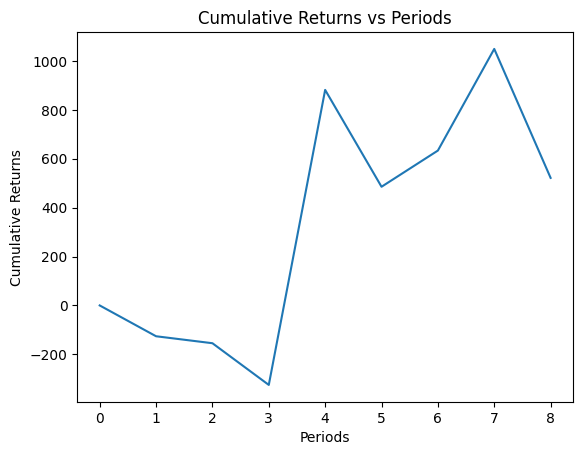

In [184]:
cumulative_returns_1 = []
cumulative_returns_1.insert(0,0)
windows.insert(0,0)
s = 0
for i in returns :
    s = s + i
    cumulative_returns_1.append(s)


plt.plot(windows,cumulative_returns_1)
plt.xlabel('Periods')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns vs Periods')
plt.show()


# Strat-2 with variable exit in window + fixed exit at the end

In [185]:
def get_returns_2(groups,master_macd,master_rsi,prices,period) :
    returns = []
    num_trades = []
    temp = 0
    intrade = []
    i = 0
    n = 0
    while i<len(prices):
        for group in groups:
            buy = 0
            buy_rsi = 100.0
            sell = 0
            sell_rsi = 0.0
            for j in range(1,len(prices.columns)):
                if(prices.columns[j] in group):
                    if(master_macd.iloc[i,j]==1):
                        if(master_rsi.iloc[i,j]<buy_rsi):
                            buy = j
                            buy_rsi = master_rsi.iloc[i,j]
                    elif(master_macd.iloc[i,j]==-1):
                        if(master_rsi.iloc[i,j]>sell_rsi):
                            sell = j
                            sell_rsi = master_rsi.iloc[i,j]
            
            if(buy!=0 and sell!=0):
                buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
                l = [i,buy,buy_quantity,sell]
                intrade.append(l)
            
            elif(buy!=0):
                for trade in intrade:
                    if(trade[3]==buy):
                        b1 = prices.iloc[trade[0],trade[1]]
                        s1 = prices.iloc[trade[0],trade[3]]
                        b2 = prices.iloc[i,trade[1]]
                        s2 = prices.iloc[i,trade[3]]
                        temp += (((b2-b1))*trade[2]) + ((s1-s2))
                        intrade.remove(trade)
                        n += 1


            elif(sell!=0):
                for trade in intrade:
                    if(trade[1]==sell):
                        b1 = prices.iloc[trade[0],trade[1]]
                        s1 = prices.iloc[trade[0],trade[3]]
                        b2 = prices.iloc[i,trade[1]]
                        s2 = prices.iloc[i,trade[3]]
                        temp += (((b2-b1))*trade[2]) + ((s1-s2))
                        intrade.remove(trade)
                        n += 1 
        
        if((i+1)%period==0):
            for x in range(len(intrade)):
                b1 = prices.iloc[intrade[x][0],intrade[x][1]]
                s1 = prices.iloc[intrade[x][0],intrade[x][3]]
                b2 = prices.iloc[i,intrade[x][1]]
                s2 = prices.iloc[i,intrade[x][3]]
                temp += (((b2-b1))*intrade[x][2]) + ((s1-s2))
                n += 1
            intrade = []
            returns.append(temp)
            num_trades.append(n)
            temp = 0
            n = 0

        i += 1

    return returns,num_trades

In [186]:
returns,num_trades = get_returns_2(groups,master_macd,master_rsi,prices,trading_window)

In [187]:
tradesheet2 = pd.DataFrame()
tradesheet2['Returns'] = returns
tradesheet2['Number of Trades'] = num_trades
windows = []
for i in range(len(returns)):
    windows.append(i+1)
tradesheet2.insert(0,f'Window (period = {trading_window})',windows)
tradesheet2

,Window (period = 15),Returns,Number of Trades
0,1,-51.500823,5
1,2,-209.776467,10
2,3,-240.627977,5
3,4,323.608595,11
4,5,-396.122669,8
5,6,16.510232,6
6,7,256.357735,10
7,8,-375.268838,2


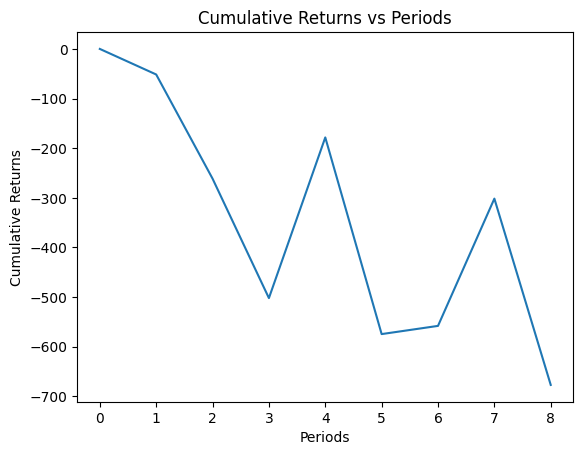

In [188]:

cumulative_returns_2 = []
cumulative_returns_2.insert(0,0)
windows.insert(0,0)
s = 0
for i in returns :
    s = s + i
    cumulative_returns_2.append(s)


plt.plot(windows,cumulative_returns_2)
plt.xlabel('Periods')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns vs Periods')
plt.show()


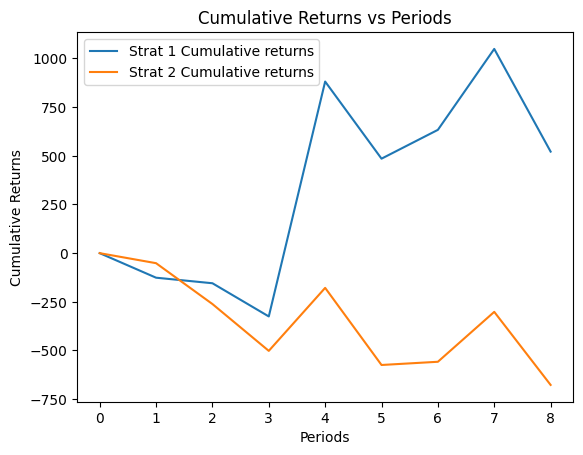

In [189]:
plt.plot(windows,cumulative_returns_1,label = "Strat 1 Cumulative returns")
plt.plot(windows,cumulative_returns_2,label = "Strat 2 Cumulative returns")
plt.xlabel('Periods')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns vs Periods')
plt.legend()
plt.show()

# strat 3 RSI Fixed exit

In [190]:
def get_returns(groups,master_rsi,prices,period) :
    returns = []
    num_trades = []
    temp = 0
    intrade = []
    i = 0
    n = 0
    while i<len(prices):
        for group in groups:
            buy = 0
            buy_rsi = 100.0
            sell = 0
            sell_rsi = 0.0
            for j in range(1,len(prices.columns)):
                if(prices.columns[j] in group):
                    if(master_rsi.iloc[i,j]<30):
                        if(master_rsi.iloc[i,j]<buy_rsi):
                            buy = j
                            buy_rsi = master_rsi.iloc[i,j]
                    elif(master_rsi.iloc[i,j]>70):
                        if(master_rsi.iloc[i,j]>sell_rsi):
                            sell = j
                            sell_rsi = master_rsi.iloc[i,j]
            
            if(buy!=0 and sell!=0):
                buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
                l = [i,buy,buy_quantity,sell]
                intrade.append(l)
        
        if((i+1)%period==0):
            for x in range(len(intrade)):
                b1 = prices.iloc[intrade[x][0],intrade[x][1]]
                s1 = prices.iloc[intrade[x][0],intrade[x][3]]
                b2 = prices.iloc[i,intrade[x][1]]
                s2 = prices.iloc[i,intrade[x][3]]
                temp += (((b2-b1))*intrade[x][2]) + ((s1-s2))
                n+=1
            intrade = []
            returns.append(temp)
            temp = 0
            num_trades.append(n)
            n = 0

        i += 1

    return returns,num_trades

In [191]:
returns,num_trades = get_returns(groups,master_rsi,prices,trading_window)

In [192]:
tradesheet3 = pd.DataFrame()
tradesheet3['Returns'] = returns
tradesheet3['Number of Trades'] = num_trades
windows = []
for i in range(len(returns)):
    windows.append(i+1)
tradesheet3.insert(0,f'Window (period = {trading_window})',windows)
tradesheet3

,Window (period = 15),Returns,Number of Trades
0,1,155.856383,1
1,2,0.000000,0
2,3,0.000000,0
3,4,0.000000,0
4,5,0.000000,0
5,6,-160.211187,3
6,7,1996.090553,3
7,8,0.000000,0


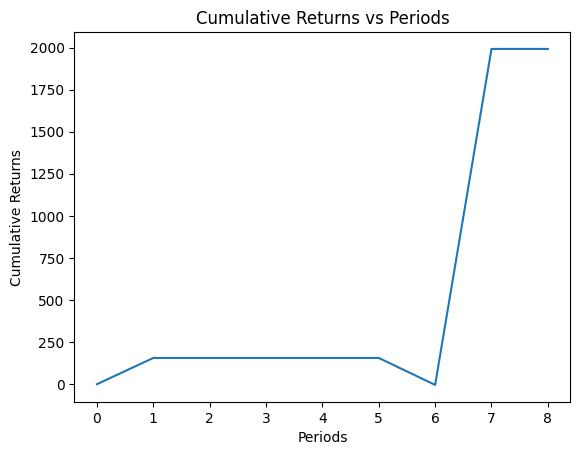

In [193]:
cumulative_returns_3 = []
cumulative_returns_3.insert(0,0)
windows.insert(0,0)
s = 0
for i in returns :
    s = s + i
    cumulative_returns_3.append(s)


plt.plot(windows,cumulative_returns_3)
plt.xlabel('Periods')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns vs Periods')
plt.show()

# strat 4 RSI variable exit

In [194]:
def get_returns(groups,master_rsi,prices,period) :
    returns = []
    num_trades = []
    temp = 0
    intrade = []
    i = 0
    n = 0
    while i<len(prices):
        for group in groups:
            buy = 0
            buy_rsi = 100.0
            sell = 0
            sell_rsi = 0.0
            for j in range(1,len(prices.columns)):
                if(prices.columns[j] in group):
                    if(master_rsi.iloc[i,j]<30):
                        if(master_rsi.iloc[i,j]<buy_rsi):
                            buy = j
                            buy_rsi = master_rsi.iloc[i,j]
                    elif(master_rsi.iloc[i,j]>70):
                        if(master_rsi.iloc[i,j]>sell_rsi):
                            sell = j
                            sell_rsi = master_rsi.iloc[i,j]
            
            if(buy!=0 and sell!=0):
                buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
                l = [i,buy,buy_quantity,sell]
                intrade.append(l)
        
        if((i+1)%period==0):
            for x in range(len(intrade)):
                b1 = prices.iloc[intrade[x][0],intrade[x][1]]
                s1 = prices.iloc[intrade[x][0],intrade[x][3]]
                b2 = prices.iloc[i,intrade[x][1]]
                s2 = prices.iloc[i,intrade[x][3]]
                temp += (((b2-b1))*intrade[x][2]) + ((s1-s2))
                n+=1
            intrade = []
            returns.append(temp)
            temp = 0
            num_trades.append(n)
            n = 0

        i += 1

    return returns,num_trades

In [195]:
tradesheet4 = pd.DataFrame()
tradesheet4['Returns'] = returns
tradesheet4['Number of Trades'] = num_trades
windows = []
for i in range(len(returns)):
    windows.append(i+1)
tradesheet4.insert(0,f'Window (period = {trading_window})',windows)
tradesheet4

,Window (period = 15),Returns,Number of Trades
0,1,155.856383,1
1,2,0.000000,0
2,3,0.000000,0
3,4,0.000000,0
4,5,0.000000,0
5,6,-160.211187,3
6,7,1996.090553,3
7,8,0.000000,0


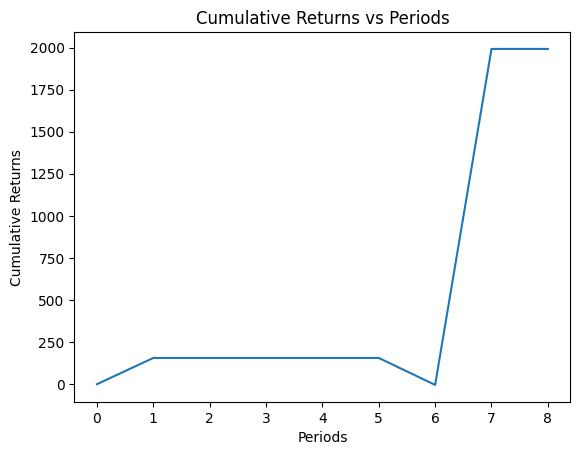

In [196]:
cumulative_returns_4 = []
cumulative_returns_4.insert(0,0)
windows.insert(0,0)
s = 0
for i in returns :
    s = s + i
    cumulative_returns_4.append(s)


plt.plot(windows,cumulative_returns_4)
plt.xlabel('Periods')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns vs Periods')
plt.show()

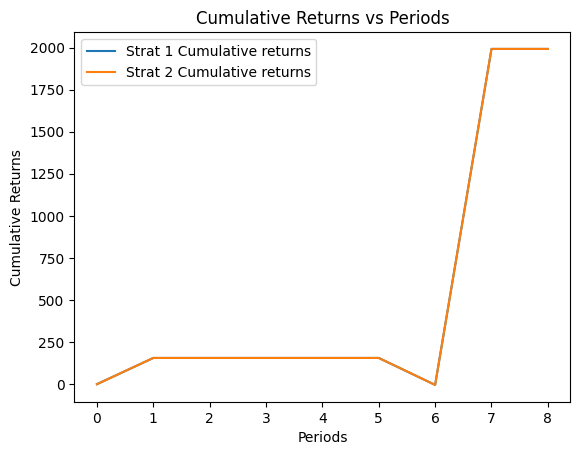

In [197]:
plt.plot(windows,cumulative_returns_3,label = "Strat 1 Cumulative returns")
plt.plot(windows,cumulative_returns_4,label = "Strat 2 Cumulative returns")
plt.xlabel('Periods')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns vs Periods')
plt.legend()
plt.show()
